In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [5]:
# Load the dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv')

In [6]:
# Ensure you have the necessary NLP libraries and datasets
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/ted/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ted/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Text Analysis
## Sentiment Analysis
df['sentiment'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [5]:
## Topic Modeling - Word Cloud for visualization
stop_words = set(stopwords.words('english'))
text = ' '.join(df['headline'])
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)

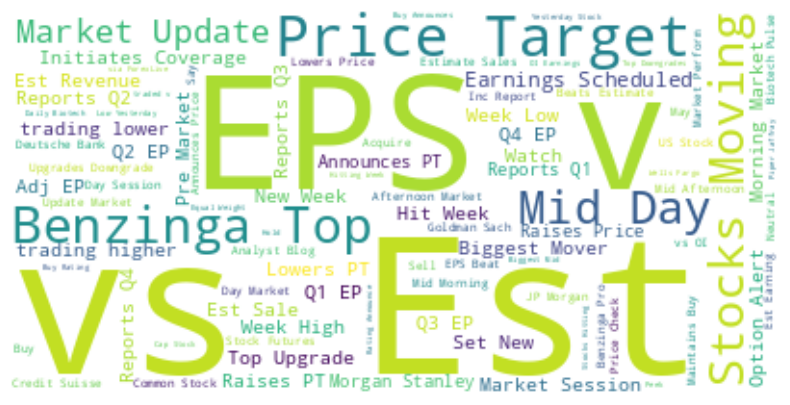

In [7]:
# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
# Tokenize and vectorize headlines
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['headline'])

In [9]:
# Topic modeling using Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [10]:
# Get the top words for each topic
feature_names = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topics.append(top_words)

In [11]:
# Display sentiment analysis results
print("Sentiment Analysis Results:")
print(df[['headline', 'sentiment']])

Sentiment Analysis Results:
                                                  headline  sentiment
0                  Stocks That Hit 52-Week Highs On Friday       0.00
1               Stocks That Hit 52-Week Highs On Wednesday       0.00
2                            71 Biggest Movers From Friday       0.00
3             46 Stocks Moving In Friday's Mid-Day Session       0.00
4        B of A Securities Maintains Neutral on Agilent...       0.00
...                                                    ...        ...
1407323             Top Narrow Based Indexes For August 29       0.15
1407324  Recap: Wednesday's Top Percentage Gainers and ...       0.15
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...       0.00
1407326  Oppenheimer Initiates China Zenix At Outperfor...       0.00
1407327  China Zenix Auto International Opens For Tradi...       0.00

[1407328 rows x 2 columns]


In [12]:
# Display top words for each topic
print("\nTop Words for Each Topic:")
for i, topic in enumerate(topics):
    print(f"Topic {i + 1}: {', '.join(topic)}")


Top Words for Each Topic:
Topic 1: downgrades, upgrades, benzinga, buy, pt, bank, raises, morgan, update, morning
Topic 2: vs, est, eps, reports, earnings, sales, scheduled, estimate, watch, q1
Topic 3: stocks, session, moving, market, week, 52, pre, coverage, initiates, hit
Topic 4: shares, says, update, trading, higher, market, analyst, companies, oil, results
Topic 5: stocks, yesterday, new, biggest, movers, week, etfs, etf, industry, set


In [9]:
# Prepare the Data
df['date'] = pd.to_datetime(df['date'], format='ISO8601')


In [10]:
# Group by publication date and calculate mean sentiment
sentiment_by_date = df.groupby(df['date'].dt.date)['sentiment'].mean()

In [11]:
# Group by publication date and calculate mean sentiment
sentiment_by_date = df.groupby(df['date'].dt.date)['sentiment'].mean()

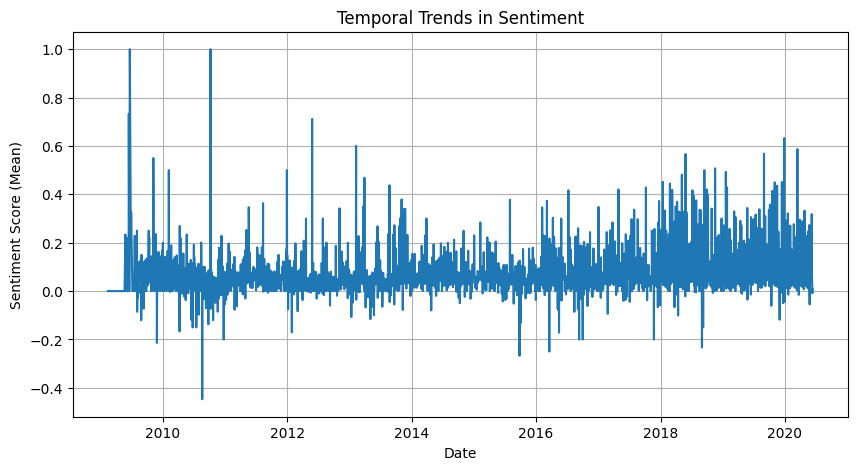

In [12]:
# Plotting temporal trends in sentiment
plt.figure(figsize=(10, 5))
plt.plot(sentiment_by_date.index, sentiment_by_date.values)
plt.title('Temporal Trends in Sentiment')
plt.xlabel('Date')
plt.ylabel('Sentiment Score (Mean)')
plt.grid(True)
plt.show()

In [13]:
# Analyze publication frequency over time
publication_frequency = df.groupby(df['date'].dt.date).size()

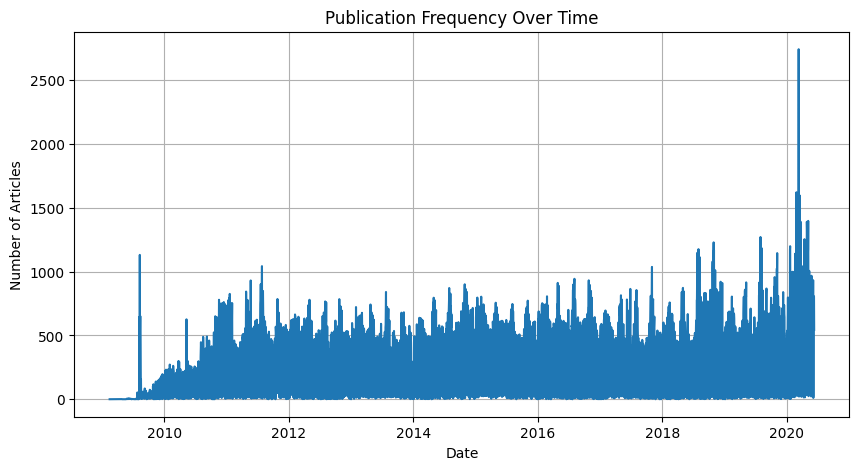

In [14]:

# Plotting publication frequency over time
plt.figure(figsize=(10, 5))
plt.plot(publication_frequency.index, publication_frequency.values)
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()